In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory Data Analysis

First we make a data frame of the dataset. The head function is run to check that we have correctly loaded the data into the dataframe.

In [3]:
train_df = pd.read_csv('train_small.csv', header=None)
test_df = pd.read_csv('test_small.csv')
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
0,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
1,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
2,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
3,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
4,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097


It looks like we successfully loaded the data.

To get a better idea of the data, we run the describe function to look at the data's distibution.

In [4]:
train_df.describe() 

,1,2,3,4,5,6,7,8,9,10,...,192,193,194,195,196,197,198,199,200,201
count,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,...,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000,70057.000000
mean,0.099733,10.678757,-1.625370,10.718501,6.801363,11.080280,-5.099666,5.412131,16.557562,0.284365,...,3.257023,7.444208,1.927193,3.328773,18.008622,-0.140578,2.298631,8.906114,15.869843,-3.323176
std,0.299646,3.037911,4.060012,2.629766,2.043351,1.627265,7.887190,0.867160,3.422813,3.335973,...,4.540336,3.018182,1.481911,3.988392,3.138089,1.427751,5.460012,0.920043,3.014017,10.438217
min,0.000000,0.597900,-15.043400,2.615000,-0.040200,5.490200,-29.777300,2.347300,5.349700,-9.905100,...,-13.999500,-2.009400,-3.566800,-11.783400,9.594900,-4.644200,-14.020400,5.960600,6.299300,-38.852800
25%,0.000000,8.461000,-4.751700,8.742600,5.252000,9.877400,-11.271800,4.768100,13.951300,-2.335100,...,-0.022800,5.161900,0.886300,0.587800,15.640500,-1.164000,-1.956100,8.253600,13.819700,-11.236200
50%,0.000000,10.526500,-1.614100,10.589100,6.837700,11.113000,-4.844100,5.387400,16.464600,0.409100,...,3.231400,7.341700,1.899100,3.387100,17.975900,-0.169000,2.390700,8.886000,15.931700,-2.800100
75%,0.000000,12.749600,1.371600,12.505900,8.333400,12.268000,0.907600,6.005500,19.119800,2.946300,...,6.410200,9.529300,2.952300,6.206400,20.421000,0.828300,6.573400,9.589400,18.071500,4.855300
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,16.806500,8.447700,27.638900,9.482200,...,18.342300,16.684600,7.611600,17.908600,27.928800,4.075600,16.226600,11.843900,26.079100,27.531900


The data shows that the mean target value is 0.099733. This means that there are more samples of customers that didn't make a transaction than not. With an imbalanced data set, we have to take steps to handle this.

Now we will look for issues within the data set, principally missing values and duplicate rows indicating. This is assess the quality of the data.

In [5]:
def missingData(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [6]:
missingData(train_df)

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,200,201
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [7]:
# Checking the data for duplicates
duplicates = print(train_df.duplicated(subset=[i for i in range(2,train_df.shape[1])]))

print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
70052    False
70053    False
70054    False
70055    False
70056    False
Length: 70057, dtype: bool
None


    There are no duplicate samples or missing values in the data set. There is no need to impute anything.

In [68]:
correlations = train_df[1:202].corr()

   1         2         3         4        5         6         7         8    \
1  1.0 -0.035942  0.052461  0.120264  0.05656  0.000147  0.100914 -0.087707   

        9         10   ...      192       193       194       195       196  \
1 -0.018687  0.035435  ...  0.05104 -0.115519 -0.062441 -0.116518 -0.027548   

       197       198       199       200      201  
1 -0.00085 -0.001532 -0.123055  0.032326  0.08714  

[1 rows x 201 columns]


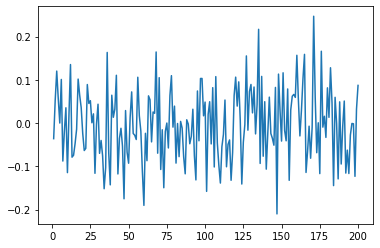

In [67]:
print(correlations.loc[1:1])

plt.plot([i for i in range(1,201)],correlations.loc[1:1,2:201].unstack())

In [22]:
print(correlations.loc[1:1])

   1         2         3         4         5         6        7         8    \
1  1.0  0.048413  0.051698  0.058345  0.013576  0.010994  0.03058  0.064283   

        9         10   ...       192       193       194       195      196  \
1 -0.007635  0.017968  ...  0.058924  0.043557 -0.047642 -0.013425 -0.02211   

        197       198       199       200      201  
1  0.027471  0.020047 -0.033738 -0.051979  0.02881  

[1 rows x 201 columns]


In [73]:
features = [i for i in range(1,202)]
correlations = train_df[1:202].corr()
correlations = correlations.abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]


In [74]:
print("\n The most correlated features are shown below:")
print(correlations.tail(10))
print("\n The least correlated features are shown below:")
print(correlations.head(10))


 The most correlated features are shown below:
       level_0  level_1         0
40190       84      142  0.257189
40191      142       84  0.257189
40192       50      127  0.258682
40193      127       50  0.258682
40194      118       79  0.260982
40195       79      118  0.260982
40196       87      170  0.269761
40197      170       87  0.269761
40198       40      108  0.302145
40199      108       40  0.302145

 The least correlated features are shown below:
   level_0  level_1         0
0       11      153  0.000007
1      153       11  0.000007
2       54      126  0.000011
3      126       54  0.000011
4      158       22  0.000011
5       22      158  0.000011
6       52      177  0.000016
7      177       52  0.000016
8      155      199  0.000021
9      199      155  0.000021


None of the features are very correlated. The most correlated features (correlation of 0.302145) are considered weakly correlated in the litterature.





### Conclusion of EDA

The data set contains more negative samples than positive ones, we will need to address this. The features are not very correlated and there seems to be few outliers.


# Data preprocessing